In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
# chager le dataset
df = pd.read_csv('credit_dataset.csv')
df

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,11,48,7,1
25130,25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2.0,23,34,4,1
25131,25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2.0,32,34,4,1
25132,25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2,1


In [4]:
# voir les valeurs manquates
df.isnull().sum()

Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

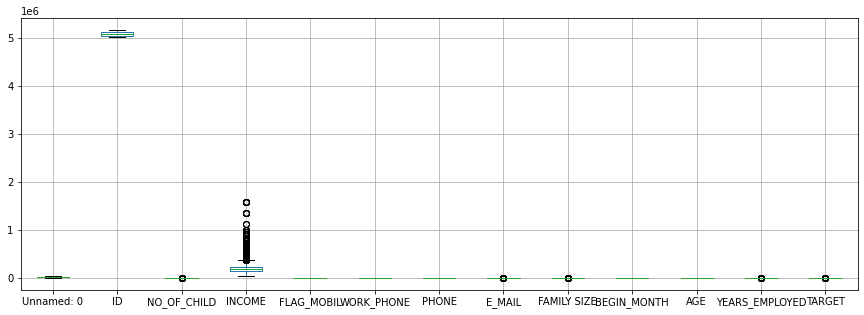

In [7]:
# identifier les outliers
df.boxplot(figsize=(15, 5));

In [11]:
features = ['NO_OF_CHILD', 'INCOME', 'E_MAIL', 'FAMILY SIZE', 'YEARS_EMPLOYED', 'TARGET']

In [30]:
# Identifier les variables numériques
num_df = df.select_dtypes(['int', 'float'])
num_df

,Unnamed: 0,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,0,112500.0,1,0,0,0,2.0,29,59,3,0
1,1,5008808,0,270000.0,1,0,1,1,1.0,4,52,8,0
2,2,5008809,0,270000.0,1,0,1,1,1.0,26,52,8,0
3,3,5008810,0,270000.0,1,0,1,1,1.0,26,52,8,0
4,4,5008811,0,270000.0,1,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,25129,5149828,0,315000.0,1,0,0,0,2.0,11,48,7,1
25130,25130,5149834,0,157500.0,1,0,1,1,2.0,23,34,4,1
25131,25131,5149838,0,157500.0,1,0,1,1,2.0,32,34,4,1
25132,25132,5150049,0,283500.0,1,0,0,0,2.0,9,49,2,1


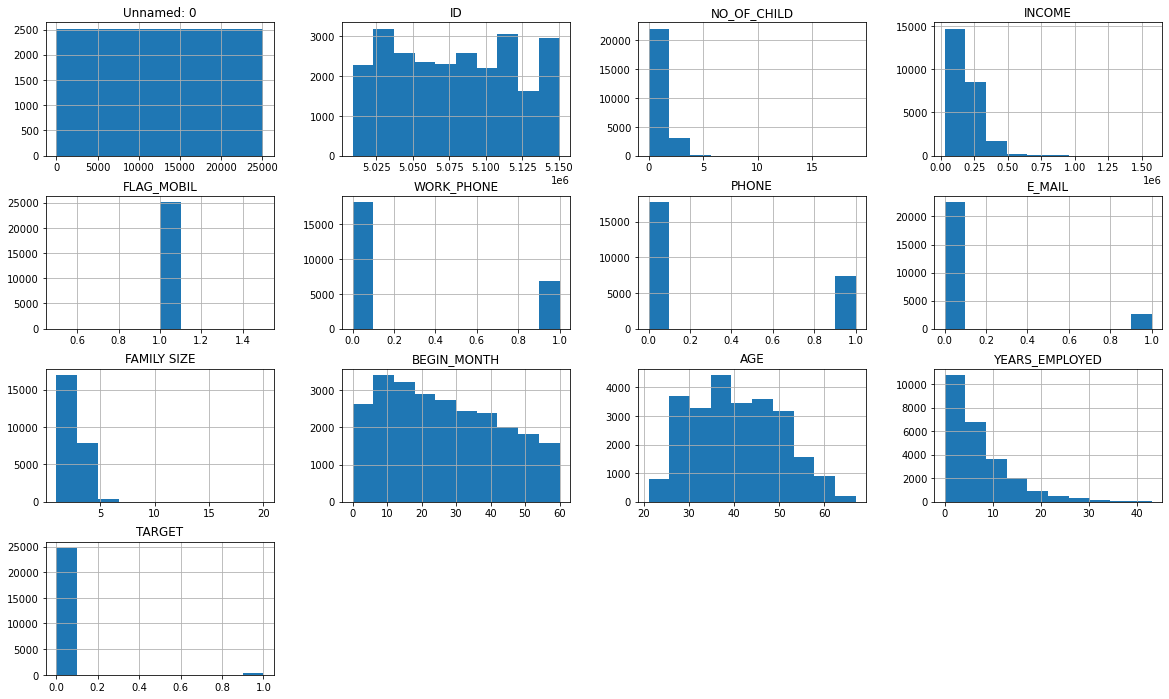

In [41]:
# visualisation avant normalisation
num_df.hist(figsize=(20, 12));

In [31]:
# detecter les valeurs aberrantes par l'intervalle interquartile
def check_outliers(data, columns):
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    return data[(data[columns] > upper_limit) | (data[columns] < lower_limit)]

In [32]:
for feature in features:
    show_detect_outliers = check_outliers(num_df, features)

In [33]:
show_detect_outliers[features]

,NO_OF_CHILD,INCOME,E_MAIL,FAMILY SIZE,YEARS_EMPLOYED,TARGET
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...
25129,NaN,NaN,NaN,NaN,NaN,1.0
25130,NaN,NaN,1.0,NaN,NaN,1.0
25131,NaN,NaN,1.0,NaN,NaN,1.0
25132,NaN,NaN,NaN,NaN,NaN,1.0


In [34]:
#  Appliquer une normalisation Min-Max sur ces variables
mms = MinMaxScaler()
df_mms = pd.DataFrame(mms.fit_transform(num_df), columns=num_df.columns)

In [35]:
df_mms

,Unnamed: 0,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0.000000,0.000000,0.0,0.055233,0.0,0.0,0.0,0.0,0.052632,0.483333,0.826087,0.069767,0.0
1,0.000040,0.000014,0.0,0.156977,0.0,0.0,1.0,1.0,0.000000,0.066667,0.673913,0.186047,0.0
2,0.000080,0.000021,0.0,0.156977,0.0,0.0,1.0,1.0,0.000000,0.433333,0.673913,0.186047,0.0
3,0.000119,0.000028,0.0,0.156977,0.0,0.0,1.0,1.0,0.000000,0.433333,0.673913,0.186047,0.0
4,0.000159,0.000035,0.0,0.156977,0.0,0.0,1.0,1.0,0.000000,0.633333,0.673913,0.186047,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,0.999841,0.995349,0.0,0.186047,0.0,0.0,0.0,0.0,0.052632,0.183333,0.586957,0.162791,1.0
25130,0.999881,0.995391,0.0,0.084302,0.0,0.0,1.0,1.0,0.052632,0.383333,0.282609,0.093023,1.0
25131,0.999920,0.995419,0.0,0.084302,0.0,0.0,1.0,1.0,0.052632,0.533333,0.282609,0.093023,1.0
25132,0.999960,0.996909,0.0,0.165698,0.0,0.0,0.0,0.0,0.052632,0.150000,0.608696,0.046512,1.0


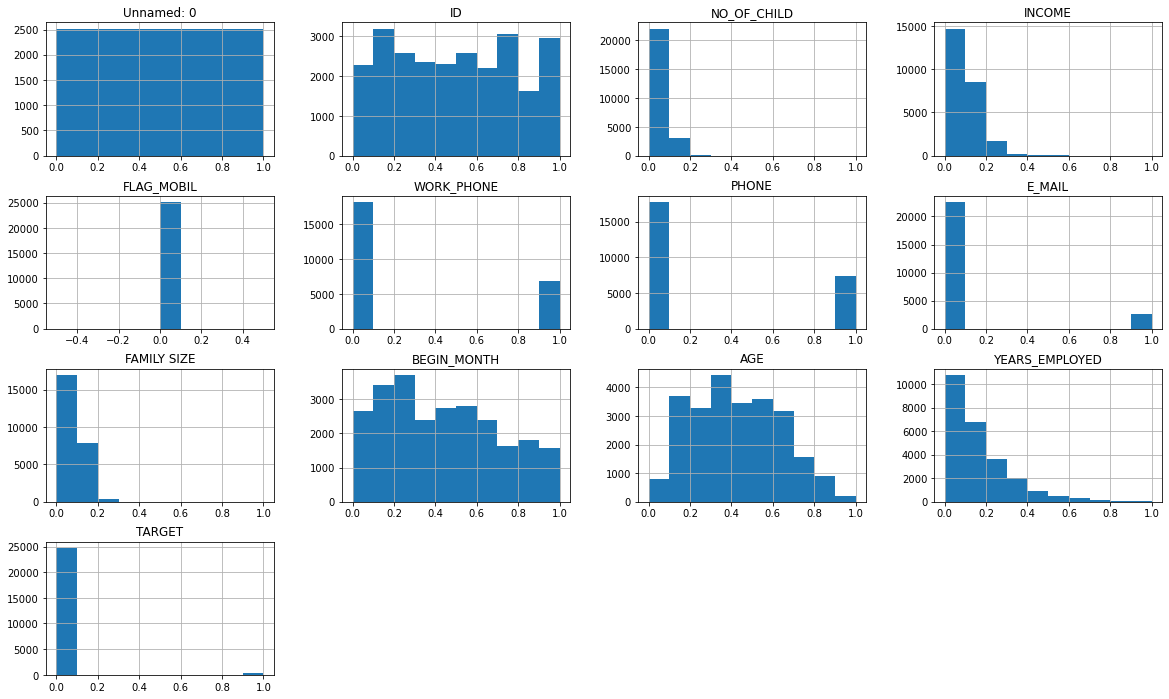

In [39]:
# visualisation apres normalisation
df_mms.hist(figsize=(20, 12));